In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 

In [129]:
dataset = pd.read_csv('data.csv')
for i in dataset.keys():
    print(i)

id
in_reply_to_user_id
is_quote
is_retweet
like_count
quote_count
quoted_text
reply_count
retweet_count
retweet_text
text
urls_expanded_url
urls_url
relevant


In [45]:
dataset

,id,in_reply_to_user_id,is_quote,is_retweet,like_count,quote_count,quoted_text,reply_count,retweet_count,retweet_text,text,urls_expanded_url,urls_url,relevant
0,0,9.140000e+17,False,False,0,0,NaN,1,0,NaN,@OzraeliAvi @SydneyLWatson @RitaPanahi @thejui...,https://www.theguardian.com/australia-news/201...,https://t.co/5AGrpxapqB,Relevant
1,1,2.574775e+08,False,False,2,0,NaN,1,0,NaN,@Red_dragon_fly @warr_cameron @NSWRFS Tell me ...,NaN,NaN,Relevant
2,2,NaN,False,False,0,0,NaN,0,0,NaN,Can we just have a fucking blanket ban on cele...,NaN,NaN,Relevant
3,3,1.429786e+07,False,False,0,0,NaN,0,0,NaN,"@scottsantens Scott, 🙏 for the tweets re: And...",NaN,NaN,Relevant
4,4,1.229958e+08,False,False,0,0,NaN,0,0,NaN,@Javedakhtarjadu Misleading information someti...,NaN,NaN,Irrelevant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,7594,1.816678e+07,False,False,0,0,NaN,0,0,NaN,"@Jim_Jordan Learn about Viruses, Vaccines, Soc...",http://TheBigVirusHoax.com,https://t.co/dujlhndLDR,Relevant
7595,7595,NaN,False,False,0,0,NaN,0,0,NaN,EDITORIAL: Say no to Trudeau's online censorsh...,https://torontosun.com/opinion/editorials/edit...,https://t.co/XHIRTa33yL,Relevant
7596,7596,NaN,False,False,0,0,NaN,0,0,NaN,I hate trump too but at least he ain’t try to ...,NaN,NaN,Irrelevant
7597,7597,NaN,True,False,0,0,@DV_Reporter @immcouncil @POTUS @HouseDemocrat...,0,0,NaN,please HELP and SUPPORT us\nWe are the biggest...,https://twitter.com/Elham40686511/status/13879...,https://t.co/GKSe2f6SiC,Irrelevant


# data Preprocessing

In [4]:
def cleanup(text):
    
    #import string
    punctuation = '[!-.:?;"\n"()''"",_%$\|/,<>’‘]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    
    #remove username with a @ and remove the link which start with http
    juntext = " ".join(filter(lambda x:x[0]!='@', text_subbed.split()))
    juntext = " ".join(filter(lambda x:not 'http' in x, juntext.split()))
    
    return juntext.lower()
    

In [5]:
id_text = dataset[['id','text']].copy()

In [6]:
# cleans up text
id_text['text'] = id_text['text'].apply(cleanup)

In [7]:
id_text

,id,text
0,0,the guardian had the balls to ignore the media...
1,1,tell me how a permanent fire ban helps anyone ...
2,2,can we just have a fucking blanket ban on cele...
3,3,scott 🙏 for the tweets re andrew yang im not f...
4,4,misleading information sometimes close the fre...
...,...,...
7594,7594,learn about viruses vaccines social media cens...
7595,7595,editorial say no to trudeaus online censorship...
7596,7596,i hate trump too but at least he aint try to b...
7597,7597,please help and support uswe are the biggest v...


In [8]:
def tokenization(text):
    tokens = text.split()
    return tokens
#applying function to the column
id_text['msg_tokenied']= id_text['text'].apply(lambda x: tokenization(x))

In [9]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
id_text['msg_tokenied']= id_text['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [10]:
id_text

,id,text,msg_tokenied
0,0,the guardian had the balls to ignore the media...,"[guardian, balls, ignore, media, ban, stopped,..."
1,1,tell me how a permanent fire ban helps anyone ...,"[tell, permanent, fire, ban, helps, anyone, wo..."
2,2,can we just have a fucking blanket ban on cele...,"[fucking, blanket, ban, celebs, tv]"
3,3,scott 🙏 for the tweets re andrew yang im not f...,"[scott, 🙏, tweets, andrew, yang, im, formal, s..."
4,4,misleading information sometimes close the fre...,"[misleading, information, sometimes, close, fr..."
...,...,...,...
7594,7594,learn about viruses vaccines social media cens...,"[learn, viruses, vaccines, social, media, cens..."
7595,7595,editorial say no to trudeaus online censorship...,"[editorial, say, trudeaus, online, censorship,..."
7596,7596,i hate trump too but at least he aint try to b...,"[hate, trump, least, aint, try, ban, backwoods..."
7597,7597,please help and support uswe are the biggest v...,"[please, help, support, uswe, biggest, victims..."


In [11]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [12]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
id_text['msg_stemmed']=id_text['msg_tokenied'].apply(lambda x: stemming(x))

In [51]:
id_text

,id,text,msg_tokenied,msg_stemmed,msg_lemmatized,msg_sent
0,0,the guardian had the balls to ignore the media...,"[guardian, balls, ignore, media, ban, stopped,...","[guardian, ball, ignor, media, ban, stop, shor...","[guardian, ball, ignore, medium, ban, stopped,...",guardian ball ignor media ban stop short name ...
1,1,tell me how a permanent fire ban helps anyone ...,"[tell, permanent, fire, ban, helps, anyone, wo...","[tell, perman, fire, ban, help, anyon, would, ...","[tell, permanent, fire, ban, help, anyone, wou...",tell perman fire ban help anyon would camp coo...
2,2,can we just have a fucking blanket ban on cele...,"[fucking, blanket, ban, celebs, tv]","[fuck, blanket, ban, celeb, tv]","[fucking, blanket, ban, celebs, tv]",fuck blanket ban celeb tv
3,3,scott 🙏 for the tweets re andrew yang im not f...,"[scott, 🙏, tweets, andrew, yang, im, formal, s...","[scott, 🙏, tweet, andrew, yang, im, formal, su...","[scott, 🙏, tweet, andrew, yang, im, formal, su...",scott 🙏 tweet andrew yang im formal support st...
4,4,misleading information sometimes close the fre...,"[misleading, information, sometimes, close, fr...","[mislead, inform, sometim, close, free, though...","[misleading, information, sometimes, close, fr...",mislead inform sometim close free thought wind...
...,...,...,...,...,...,...
7594,7594,learn about viruses vaccines social media cens...,"[learn, viruses, vaccines, social, media, cens...","[learn, virus, vaccin, social, media, censorsh...","[learn, virus, vaccine, social, medium, censor...",learn virus vaccin social media censorship hum...
7595,7595,editorial say no to trudeaus online censorship...,"[editorial, say, trudeaus, online, censorship,...","[editori, say, trudeau, onlin, censorship, plan]","[editorial, say, trudeaus, online, censorship,...",editori say trudeau onlin censorship plan
7596,7596,i hate trump too but at least he aint try to b...,"[hate, trump, least, aint, try, ban, backwoods...","[hate, trump, least, aint, tri, ban, backwood,...","[hate, trump, least, aint, try, ban, backwoods...",hate trump least aint tri ban backwood lol
7597,7597,please help and support uswe are the biggest v...,"[please, help, support, uswe, biggest, victims...","[pleas, help, support, usw, biggest, victim, m...","[please, help, support, uswe, biggest, victim,...",pleas help support usw biggest victim muslimba...


In [14]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
id_text['msg_lemmatized']=id_text['msg_tokenied'].apply(lambda x:lemmatizer(x))

In [50]:
id_text['msg_sent']=id_text['msg_stemmed'].apply(lambda x:" ".join(x)) 

# classification

In [132]:
# split data to test and train set
X = id_text.iloc[:, -1].values
X.shape

(7599,)

In [130]:
y = dataset.iloc[:, -1].values

In [114]:
X

array(['guardian ball ignor media ban stop short name tim stewart follow',
       'tell perman fire ban help anyon would camp cook hobbi metalwork even mow lawn danger blanket ban impract mayb ban train theyr respons mani fire spark set growth along track ablaz',
       'fuck blanket ban celeb tv', ...,
       'hate trump least aint tri ban backwood lol',
       'pleas help support usw biggest victim muslimban want file complaint group winner 2018 problem interview trump ban famili issu visa attent greatest victim muslimban forgotten nobodi care themdiversity20172020 deni visa pp9645 consid biden administrationhear amp support defend humanright@aclu@vp@statedeptspox@potus@secblinken',
       'theyll ban donald trump virtu signal though pfa hit twitter take racial abus post — report last novemb still platform recent last week'],
      dtype=object)

In [115]:
for i in range(len(y)):
    if y[i]=='Relevant':
        y[i]=1
    else:
        y[i]=0
y=y.astype('int')

# handle unbalance class data

In [204]:
dataset = pd.read_csv('data.csv')
X = id_text.iloc[:, -1].values
y = dataset.iloc[:, -1].values
for i in range(len(y)):
    if y[i]=='Relevant':
        y[i]=1
    else:
        y[i]=0
y=y.astype('int')

In [205]:
y=y.reshape(7599,1)
X=X.reshape(7599,1)

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = undersample.fit_resample(X, y)

print(Counter(y_over))

Counter({1: 6549, 0: 6549})


In [206]:
y=y_over
X=X_over

# try random forest classification model

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(X.ravel()).toarray()
labels = y
labels=labels.astype('int')
features.shape

(13098, 14442)

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)
rfClassifier=RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
rfClassifier.fit(X_train,y_train)
y_pred=rfClassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8030534351145038

# compare accuracy of 4 classification models:
#### - Random Forest Classifier
#### - Linear Support Vector Machine
#### - Multinomial Navy Bayse
#### - Logistic Regression

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

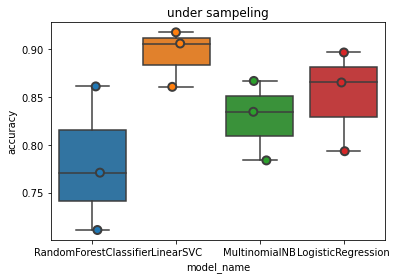

model_name
LinearSVC                 0.894869
LogisticRegression        0.851809
MultinomialNB             0.828447
RandomForestClassifier    0.781035
Name: accuracy, dtype: float64


In [153]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title('under sampeling')
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

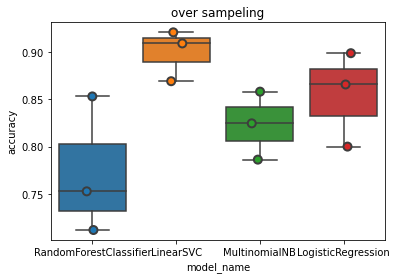

model_name
LinearSVC                 0.899450
LogisticRegression        0.854711
MultinomialNB             0.822950
RandomForestClassifier    0.772637
Name: accuracy, dtype: float64


In [210]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title('over sampeling')
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

In [148]:
cv_df.groupby('model_name')

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.710948
1,RandomForestClassifier,1,0.861200
2,RandomForestClassifier,2,0.770957
3,LinearSVC,0,0.860742
4,LinearSVC,1,0.917774
5,LinearSVC,2,0.906093
6,MultinomialNB,0,0.783784
7,MultinomialNB,1,0.866926
8,MultinomialNB,2,0.834631
9,LogisticRegression,0,0.793404
